label(sınıf) sayısı : 10


C:\Users\felin\AppData\Local\Temp\ipykernel_8776\4005514576.py:103: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(dataGen.flow(x_train,y_train,batch_size = batch_size),  #dataGen.flow işlevini(veri artırmak ve yinelemek) kullanarak modeli eğitiriz


Epoch 1/15
16/16 [==============================] - 5s 200ms/step - loss: 2.2721 - accuracy: 0.1515 - val_loss: 2.0335 - val_accuracy: 0.4902
Epoch 2/15
16/16 [==============================] - 3s 164ms/step - loss: 1.8968 - accuracy: 0.4221 - val_loss: 1.1776 - val_accuracy: 0.8120
Epoch 3/15
16/16 [==============================] - 3s 155ms/step - loss: 1.3234 - accuracy: 0.5868 - val_loss: 0.5365 - val_accuracy: 0.9075
Epoch 4/15
16/16 [==============================] - 3s 161ms/step - loss: 0.9473 - accuracy: 0.7053 - val_loss: 0.3284 - val_accuracy: 0.9203
Epoch 5/15
16/16 [==============================] - 3s 171ms/step - loss: 0.7399 - accuracy: 0.7690 - val_loss: 0.2472 - val_accuracy: 0.9321
Epoch 6/15
16/16 [==============================] - 3s 173ms/step - loss: 0.6227 - accuracy: 0.8094 - val_loss: 0.2058 - val_accuracy: 0.9469
Epoch 7/15
16/16 [==============================] - 3s 173ms/step - loss: 0.5269 - accuracy: 0.8432 - val_loss: 0.1858 - val_accuracy: 0.9439
Epoch 

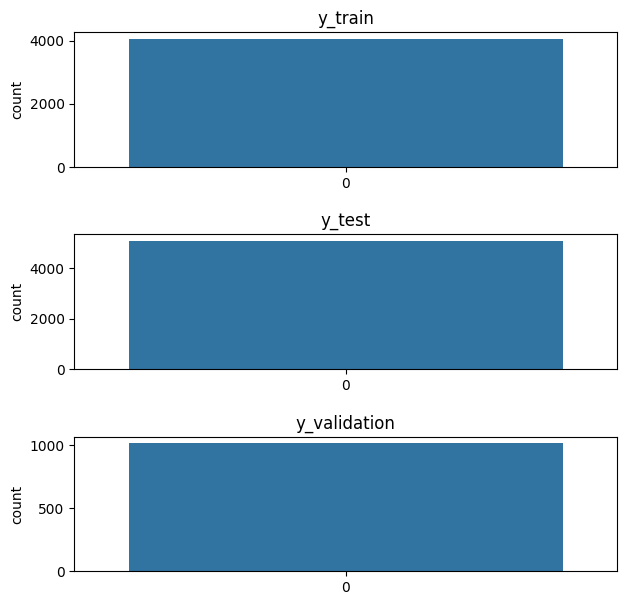

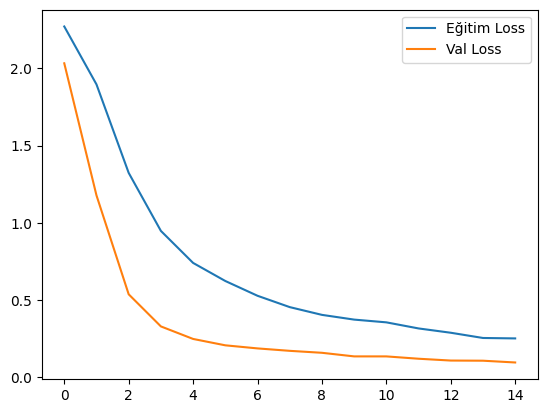

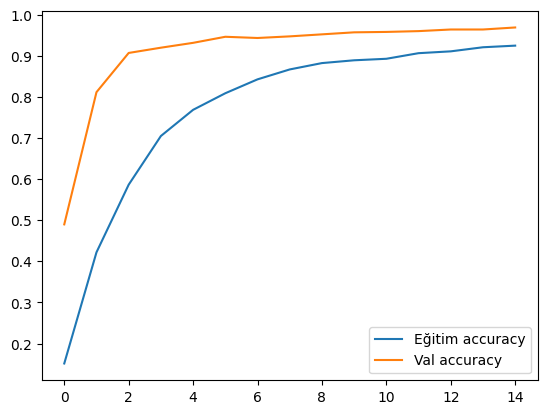

159/159 [==============================] - 1s 6ms/step - loss: 0.0821 - accuracy: 0.9754
Test Loss :  0.08208904415369034
Test Accuracy :  0.9753937125205994
32/32 [==============================] - 1s 6ms/step


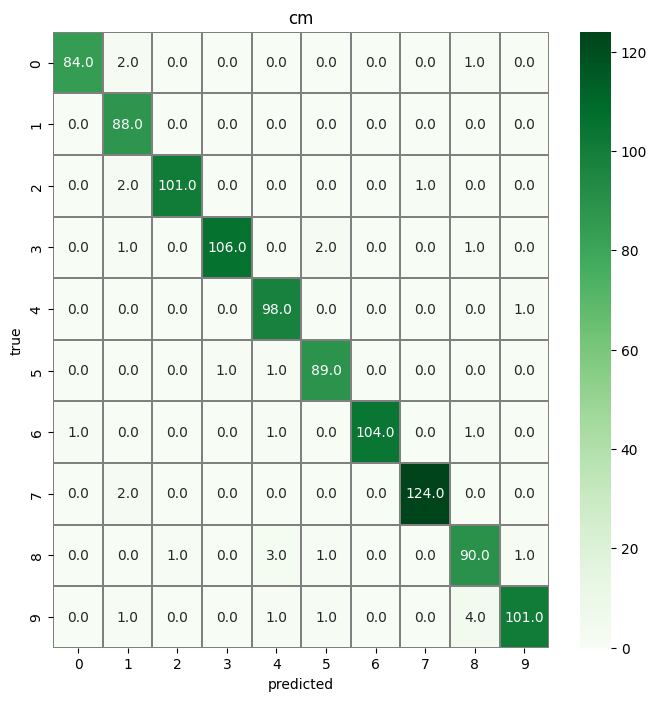

In [17]:
import seaborn as sns  #gerekli kütüphaneleri(paketleri) tanımlıyoruz
import numpy as np 
import cv2
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator  #zoom,kaydırma,döndürme işlemleri
import pickle #modeli yuklemek kaydetmek için 

path = 'myData'  #datasetimizin yolunu veriyoruz

myList = os.listdir(path)  #verileri içe aktarıyoruz

noOfClasses = len(myList)  #sınıf sayımızı alıyoruz
print('label(sınıf) sayısı :',noOfClasses)

images = [] #image listesi oluşturuyoryz
classNo = []  #etiketler için

for i in range(noOfClasses):
    myImageList = os.listdir(path + '//' + str(i)) #myData/i
    for j in myImageList:
        img = cv2.imread(path + '//' + str(i) + '//' + j) #myData/i/j içindeki 0-1-2-3-3 vb adlı klasörlerdeki resimlere erişiyoruz
        img = cv2.resize(img,(32,32))
        images.append(img)
        classNo.append(i)

# print(len(images))
# print(len(classNo))
images = np.array(images)  #images ve classNo listelerini numpy dizilerine dönüştürürüz
classNo = np.array(classNo)

#veriyi ayırma işlemi  
x_train,x_test,y_train,y_test = train_test_split(images,classNo,test_size = 0.5,random_state = 42) #verinin %50 sini test %50 sini eğitim için ayırıyoruz(images'in %50 si x_train %50si x_test)(classNo'nun %50si y_train %50 si y_test)
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size = 0.2 ,random_state = 42) #doğrulama içinde veri ayırdık


#GRAFİK 
# y_train = pd.DataFrame(data=y_train, columns=["variable"])
# y_test = pd.DataFrame(data=y_test, columns=["variable"])
# y_validation = pd.DataFrame(data=y_validation, columns=["variable"])

# fig, axes = plt.subplots(3,1,figsize = (7,7))  #eğitim test ve doğrulama kümelerindeki sınıf etiket sayısını görselleştiriyoruz
# fig.subplots_adjust(hspace = 0.5)

# plt.subplot(3, 1, 1)
# sns.countplot(x='variable',data = y_train)
# axes[0].set_title('y_train')

# plt.subplot(3, 1, 2)
# sns.countplot(x='variable',data=y_test)
# axes[1].set_title('y_test')

# plt.subplot(3, 1, 3)
# sns.countplot(x='variable',data=y_validation)
# axes[2].set_title('y_validation')

#preprocess
def preprocess(img):  
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #resmi gri tona çeviriyoruz
    img = cv2.equalizeHist(img) #histogram eşitliyoruz 
    img = img/255  #ve normalize ediyoruz
    return img
# idx = 231
# img = preprocess(x_train[idx])
# img = cv2.resize(img,(300,300)) 
# cv2.imshow('preprocess',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#preprocess işlemini eğitim, test ve doğrulama kümelerindeki her görüntüye uyguluyoruz 
x_train = np.array(list(map(preprocess,x_train))) 
x_test = np.array(list(map(preprocess,x_test)))  
x_validation= np.array(list(map(preprocess,x_validation)))

#giriş görüntülerini tek boyutlu hale getiriyoruz
x_train = x_train.reshape(-1,32,32,1)  # -1 ne demek ==> x_train'in boyutu neyse sen onu kendine göre ayarla 
x_test = x_test.reshape(-1,32,32,1)  
x_validation = x_validation.reshape(-1,32,32,1)

#data generate
dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1,rotation_range=10)  #0.1 oranında width ve height kaydırma 0.1 oranında zoom ve döndürme açısı olarak 10
dataGen.fit(x_train) #eğitim verilerine uyguluyoruz

y_train =to_categorical(y_train,noOfClasses)  # etiket 3 ise: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] vektöre dönüştürür.
y_test = to_categorical(y_test,noOfClasses)  
y_validation = to_categorical(y_validation,noOfClasses)

model = Sequential()
model.add(Conv2D(input_shape = (32,32,1),filters = 8,kernel_size= (5,5),activation='relu',padding = 'same')) #same padding 1 sıra piksel ekler
model.add(MaxPooling2D(pool_size = (2,2))) 

model.add(Conv2D(filters = 16,kernel_size= (3,3),activation='relu',padding = 'same')) #same padding 1 sıra piksel ekler
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.2)) #overfitting'in(veri ezberleme) önüne geçmek adına - yüzde 20'si kaybolsun yüzde 80'i ile ilgilenelim
model.add(Flatten()) #Düzleştirme işlemi

model.add(Dense(units = 256,activation='relu')) # 256 hücreden(nöron) oluşan bir layer   
model.add(Dropout(0.2)) #overfitting'in(veri ezberleme) önüne geçmek adına - yüzde 20'si kaybolsun yüzde 80'i ile ilgilenelim

model.add(Dense(units =noOfClasses,activation='softmax')) # çıktı layerımız
model.compile(loss = 'categorical_crossentropy',optimizer=('Adam'),metrics = ['accuracy'])   

batch_size = 250 #resimlerimizin kaç grup halinde iterasyona sokulacağı

hist = model.fit_generator(dataGen.flow(x_train,y_train,batch_size = batch_size),  #dataGen.flow işlevini(veri artırmak ve yinelemek) kullanarak modeli eğitiriz    
                                        validation_data = (x_validation,y_validation),
                                        epochs = 15, #epochs = resimlerimizin toplamda kaç kez eğitileceği
                                        steps_per_epoch = x_train.shape[0]//batch_size,  #her bir epochs'daki adım sayısı 
                                        shuffle = 1)  #veriyi karıştırıyoruz

pickle_out = open('model_trained.p','wb') #modelimizi kaydediyoruz
pickle.dump(model,pickle_out)
pickle_out.close()

#değerlendirmeler
hist.history.keys()   #eğitimdeki kayıp ve doğruluk değerlerini döndürür

plt.figure()  #eğitimdeki kayıp ve doğruluk değerlerini çizimlerle görselleştiriyoruz
plt.plot(hist.history['loss'],label ='Eğitim Loss')
plt.plot(hist.history['val_loss'],label ='Val Loss')
plt.legend()
plt.show()

plt.figure()  #eğitim ve doğrulama doğruluklarını gösteriyoruz
plt.plot(hist.history['accuracy'],label ='Eğitim accuracy')
plt.plot(hist.history['val_accuracy'],label ='Val accuracy')
plt.legend()
plt.show()

score = model.evaluate(x_test,y_test,verbose = 1)  #test seti üzerindeki performanslarını yazdırıyoruz
print('Test Loss : ',score[0])
print('Test Accuracy : ',score[1])

y_pred = model.predict(x_validation)  #predict yöntemi, x_validation verilerini kullanarak sınıf olasılıklarını tahmin eder
y_pred_class = np.argmax(y_pred,axis = 1)  #en yuksek olasılığa sahip olan indexini döndürür
y_true = np.argmax(y_validation, axis = 1) #gerçek sınıfın index değerini döndürür

cm = confusion_matrix(y_true,y_pred_class) #tahmin edilen ve gerçek sınıf etiketlerini kullanarak bir karmaşıklık matrisi oluşturuldu

f, ax  = plt.subplots(figsize=(8,8)) 
sns.heatmap(cm,annot = True,linewidths= 0.1,cmap ='Greens',linecolor = 'gray',fmt = '.1f',ax = ax)
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('cm')
plt.show()


 